In [2]:
import sys
sys.path.append('./lib')
from audio_sine_model import AudioSineModel
#from sine_model_plotter import SineModelPlotter
asm = AudioSineModel('./audioa.wav')

In [3]:
asm = AudioSineModel('./audioa.wav')
asm2 = AudioSineModel('./audioa-c2eq1.wav')
asmb = AudioSineModel('./audiob.wav')
asm.sine_model_analysis()
asm2.sine_model_analysis()
asmb.sine_model_analysis()


./lib/audio_sine_model.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  lines.append([pos0, pos1, start_val, last_val, (last_val-start_val)/(pos1-pos0)])


In [4]:
#smp = SineModelPlotter([asm2, asm])
#smp.plot('test')

import sys, os, time
import numpy as np
import matplotlib.pyplot as plt
import IPython
from IPython.core.debugger import set_trace

class SineModelPlotter:
  def __init__(self, audio_sine_models,max_plot_freq=10000):
    self.audio_sine_models = audio_sine_models
    self.max_plot_freq=max_plot_freq
    first_audio = self.audio_sine_models[0]
    self.sample_rate = first_audio.sample_rate
    self.maxplotbin = int(first_audio.fft_size*max_plot_freq/self.sample_rate)
    self.num_frames = int(first_audio.stft_magnitudes[:,0].size)
    self.frame_time = first_audio.hop_size*np.arange(self.num_frames)/float(self.sample_rate)
    self.bin_freq = np.arange(self.maxplotbin+1)*float(self.sample_rate)/first_audio.fft_size


  def plot(self, title, max_plot_freq=5000.0):

    plt.figure(1, figsize=(16.5, 5))
    #plt.pcolormesh(frame_time, bin_freq, np.transpose(mX[:,:maxplotbin+1]))
    colors = [(0, 0, 1, 0.5), (1, 0, 0, 0.5)]
    idx = 0
    for audio_sine_model in self.audio_sine_models:
        tracks = audio_sine_model.frequencies*np.less(audio_sine_model.frequencies, self.max_plot_freq)
        tracks[tracks<=0] = np.nan
        plt.plot(self.frame_time[0:tracks.shape[0]], tracks, color=colors[idx], lw=1.5)
        l =  np.array(audio_sine_model.lines)
        plt.plot(l[:,0], l[:,2], 'g^', color=colors[idx])
        idx = idx+1

    #plt.axis([0, self.frame_time, 0, max_plot_freq])
    plt.autoscale(tight=True)
    plt.title(title)
    plt.tight_layout()
    plt.show()


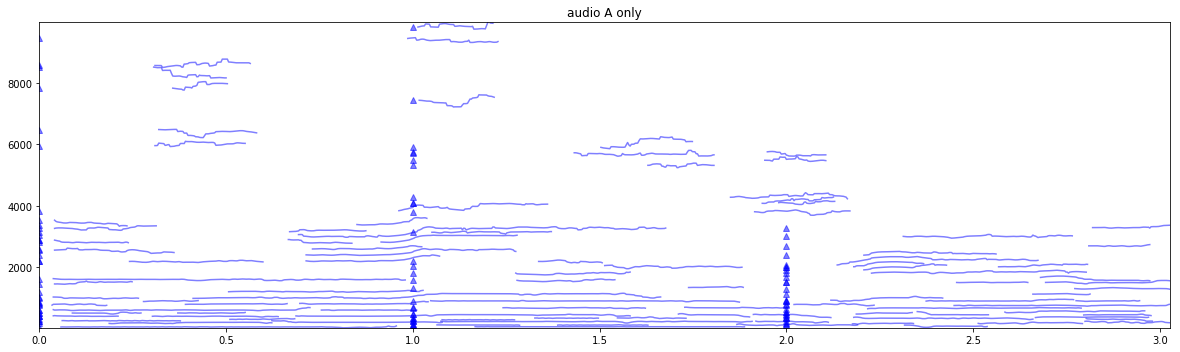

In [5]:
smp = SineModelPlotter([asm])
smp.plot('audio A only')

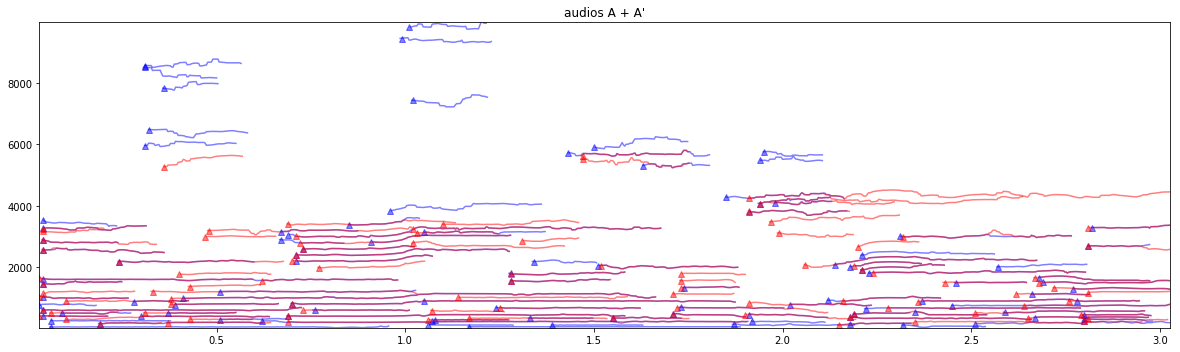

In [55]:
smp = SineModelPlotter([asm, asm2])
smp.plot("audios A + A'")

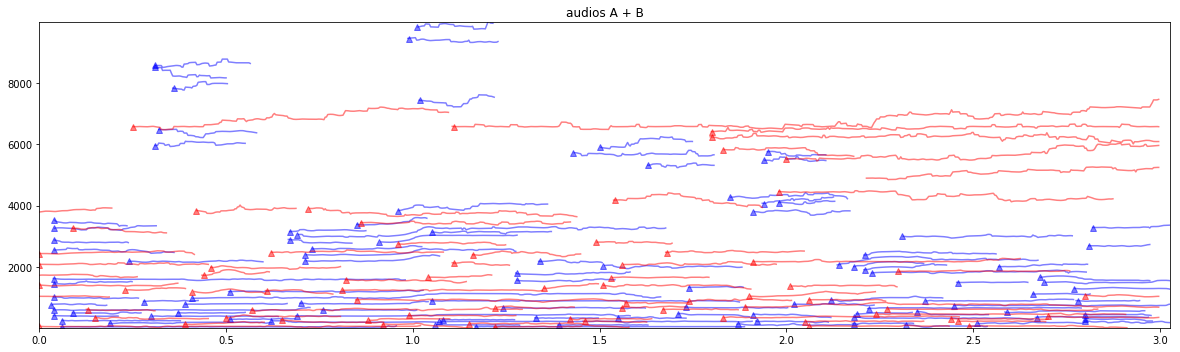

In [56]:
smp = SineModelPlotter([asm, asmb])
smp.plot('audios A + B')

In [7]:
#asm.lines

In [8]:
#asm2.lines

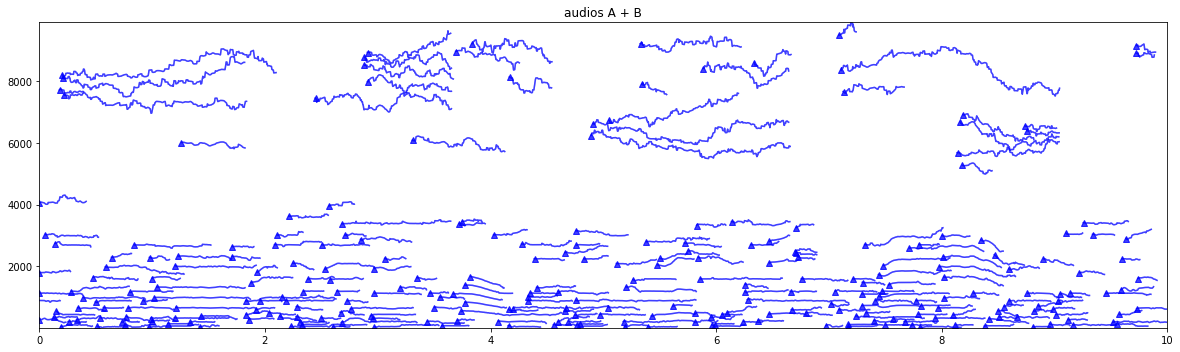

In [5]:
asm = AudioSineModel('./audio1_10s.wav')
asm2 = AudioSineModel('./audio1_10s-mp3-96kbps-compr-phaser-comp.wav')
asm.sine_model_analysis()
asm2.sine_model_analysis()
smp = SineModelPlotter([asm])
smp.plot('audios A + B')

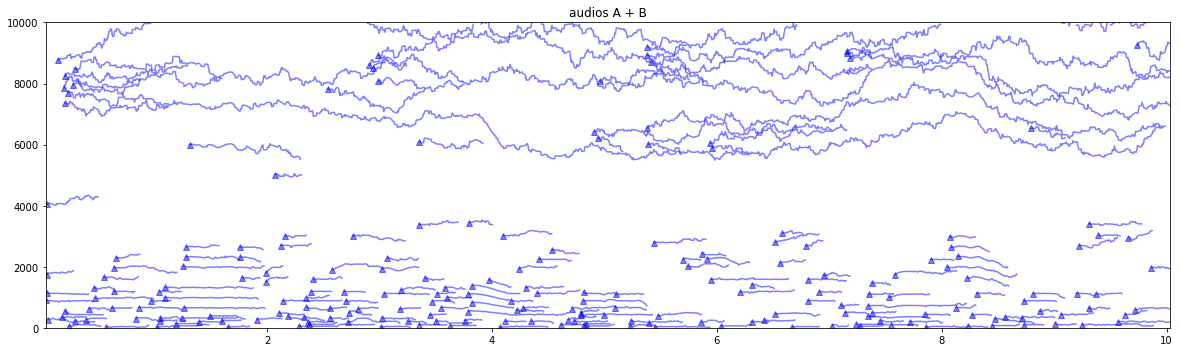

In [6]:
smp = SineModelPlotter([asm2])
smp.plot('audios A + B')

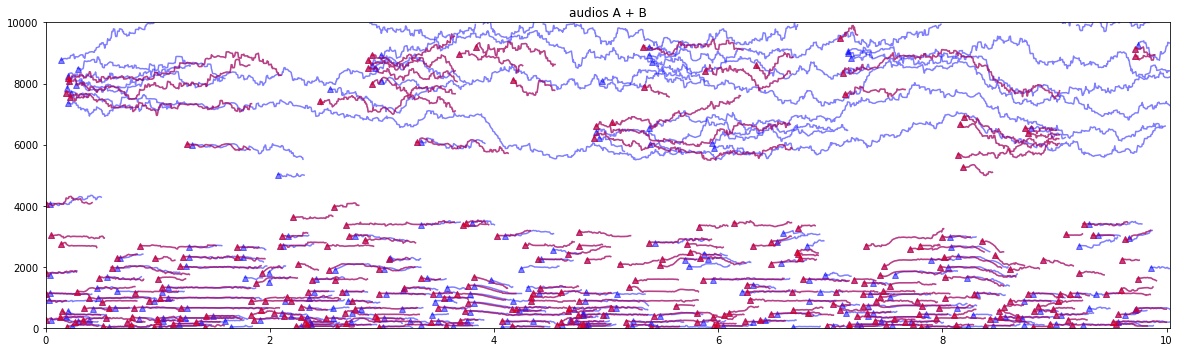

In [10]:
smp = SineModelPlotter([asm2, asm])
smp.plot('audios A + B')